#Table of Contents 
01. Abstract
02. Exploring the data and Feature Engineering 
03. Numeric Features Engineering
04. Handling Null values
05. Non-numeric Features
06. Feature Engineering
07. Missing Values
08. Model Building
>8.1 Linear Regression using scikit learn <br /> 
8.2 Improving the model <br /> 
8.3 Result Submission <br /> 
09. Deep Neural Network using Tensorflow
> 9.1 Processing for Neural Network<br />
>9.2 The Model<br />
>9.3 Weights and Bias<br />
>9.4 Activation function<br />
>9.5 Loss function<br />
>9.6 Regularization<br />
>9.7 Model Optimizers<br />
>9.8 Graph and Session<br />
>9.9 Result Submission
10. References









#01. Abstract

---
In this assignment an attempt was made to clean the data, analyze it and fitted it to a regression model and tried to predict the outcome. First the data was acquired and and environment was created for working on the data. On the next step the data was explored and featured engineered. The we worked with the numerical feature and used corelation feature to determine the most related featues to work on. Then after dealing with the non-numerical features the model was built and implemented. At last the rmse error was calculated.


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
train_ID = train['Id']
test_ID = test['Id']

Here all the tools and libraries necessary were imported. Pandas is used to read a CSV file. "pd.read_csv" method is used to create a dataframe from a csv file.


Now to check the data we can write

In [0]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


We can see that train has 81 columns and test has 80 columns. Test data having only 80 columns is due to test data not including final sales price information. We can inspect a few rows using the train.head() meathod.



In [0]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We will use Matplotlib to plot our data so that we can visualize the data to understand the distribution of data, checking outilers and percept othrer patterns. 

#02. Exploring the data and Feature Engineering

The target of Kaggle Houseprice is to predict the final sale price of the house. This is stored in the SalePrice column. We can use Series.describe() to get more information about the data. 

In [0]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

I used describe method on SalePrice column to get more information about the SalePrice of house. This gives me the mean, std, mean, max. We can see that the average is around $180000. Now we will check for skewness in the distribution. Skewness is a measure of the shape of the distributed values. When working with regression we need to log transform the data to improve the linearity of the data. We will first log transform the data so when we get our result it will also be in log transformed state so we will need to revert them back to their original values by undoing log transformation. np. log() will transform our value and np.exp() will revert them back to their original format. 

Now we will use plt.hist() to plot the histogram of SalePrice and measure the skewness with SalePrice.skew() 

Skew is: 1.8828757597682129


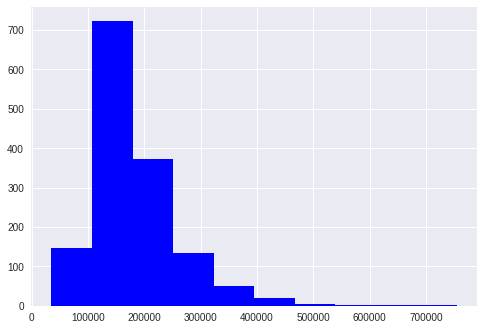

In [0]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

Skew is: 1.88287575977

We can see that the distribution is positively skewed as the tail is longer on the right. Now we will transform the data using np.log() , recalculate the skewness replot the data. If the value becomes closer to 0 that will mean the the data is resembling a normal distribution.  

Skew is: 0.12133506220520406


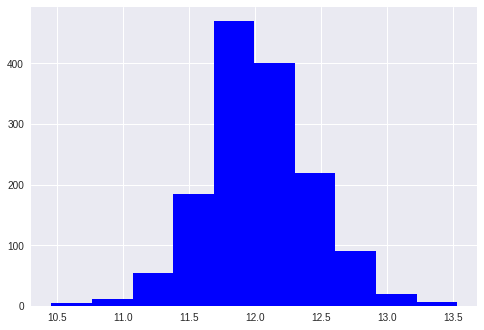

In [0]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

Skew is: 0.121335062205

As we have finished transforming our target varibles now we will move onto working with the features. 

#03. Numeric Features Engineering

We will use .select_dtypes() method to see which columns have what type of values.

In [0]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

Now we will use .corr() method to see the correaltion between the features and the target. 

In [0]:
corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The first five features are the most positively correlated with SalePrice and the negative valued features are the least correlated.


Now we will start working with OverallQual as it most positively correlated with SalePrice. We will use .unique() method to get the unique values. 

In [0]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

We can see that OverallQual values are integers in the range of 1 to 10. Now we will create a pivot table to inspect the relationship between OverallQual and SalePrice. We will look at the median value here. 

In [0]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


Now we will create a barplot to visualize the result. 

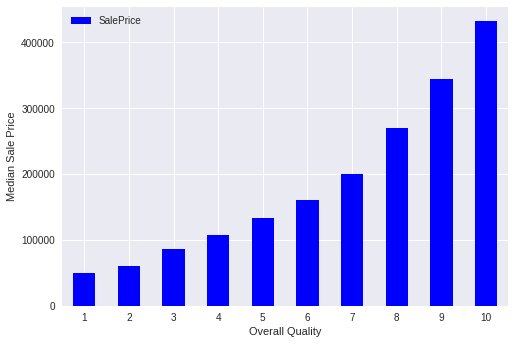

In [0]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

We can see that the sales price increases as the Overall Quality increases. Now we will use plt.scatter() to generate a plot and visualize the relationship between the 2nd most positively correlated attribute and out target atrribute. This scatter plot will show us the relationship between GrLivArea and SalePrice. 

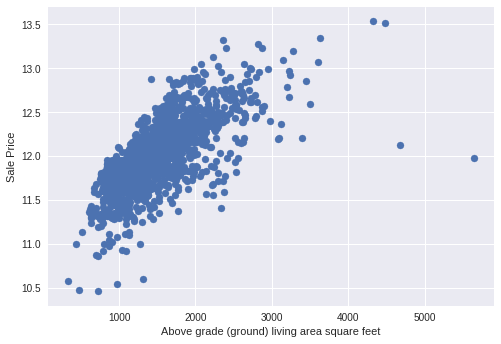

In [0]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

We will do the same for GarageArea. 

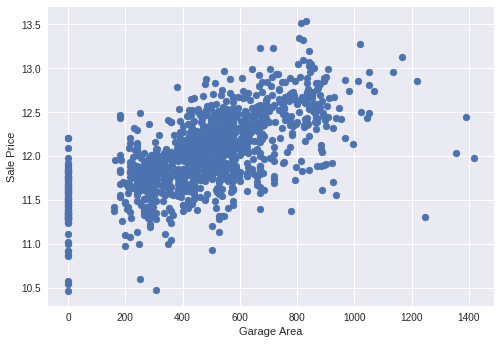

In [0]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

We can see that there many homes which don't have a garage. Here we can see a few outliers as well. Outliers can affect our regression line by pulling them further away from actual line. Now we will create a new dataframe removing those outliers. 

In [0]:
train = train[train['GarageArea'] < 1200]

Now we will plot it again

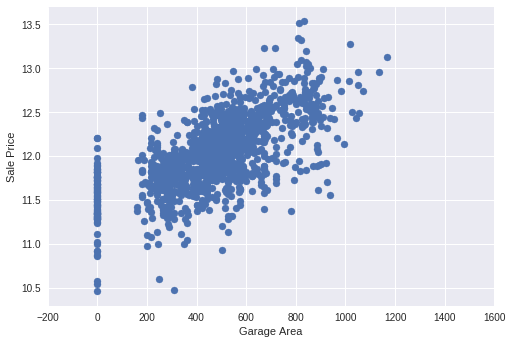

In [0]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

#04. Handling Null Values

We will now count how many values we have in the dataset. train.isnull().sum() will give us a count of null values in each column 

In [0]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


The houses which don't have any pools returns value NaN in Pool Quality. Now we will look at MiscFeature column. We will use MiscFeature.unique() to get the unique values. 

In [0]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


We can use this information later.

#05. Non-numeric Features

Now we will deal with the non-numeric features. 

In [0]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


Here counts is the number of non-null values we have, unique is the number of unique values, top are the values which are most frequent and freq shows how many of that value we have. Later we will use one-hot encoding to transform these categorical values into numerical values. 

#06. Feature Enginering

Anything we apply on train data will have to match the test data meaning that we will have to apply those changes on test data too. First we are going to work on street data which show if it is gravel or paved. 

In [0]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



We will one-hot encode the Pave and Grvl so that we can work with these data. 

In [0]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [0]:
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


Here we encoded these categorical values into boolean values so that we can work with it.  Now we will work with SaleCondition.

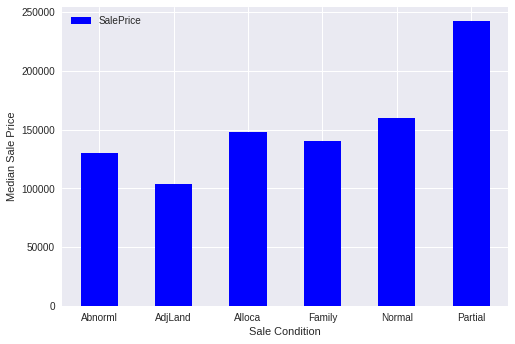

In [0]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Here the partial has a higher median sale price than others. We will assign 1 to all houses which is partial otherwise 0. 

In [0]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

Now we wil plot it.

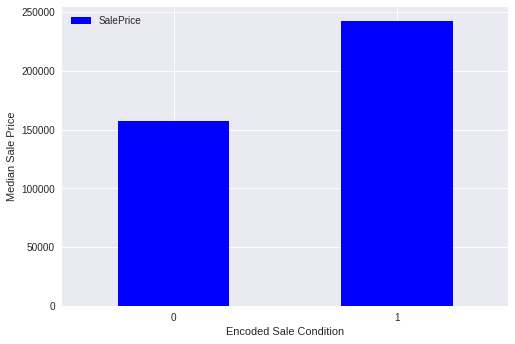

In [0]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#07. Missing Values

We will use interpolation for the missing values. We will assign the average of that feature to te missing values. 

In [0]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()


In [0]:
data_test = test.select_dtypes(include=[np.number]).interpolate().dropna()


Now we will check if all the columns have non null values. 

In [0]:
sum(data.isnull().sum() != 0)

0

#08. Model Building 

## 08.1 Linear Regression using scikit learn 

y will be our target variable and x will be our feature. We will use np.log() to transform the y variables. 

In [0]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [0]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,1,0


We will now use train_test_split() to split the data into training set and test set

In [0]:
data_test= data_test.drop(['Id'], axis=1)

In [0]:
data_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,120,0,0,6,2010,1.0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,36,0,0,0,0,12500,6,2010,1.0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,34,0,0,0,0,0,3,2010,1.0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,36,0,0,0,0,0,6,2010,1.0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,82,0,0,144,0,0,1,2010,1.0,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=.20)

We will first create a LinearRegression Model and instantiate it. 

In [0]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

Next we will fit the model to our test set. 

In [0]:
model = lr.fit(X_train, y_train)

Now we will evaluate its performance using r^2 (r-square) method. 

In [0]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.9027087971573815


Now we will consider RMSE to calculate our error. model.predict() will return a set of predictions given a set of predictors. We will feed the mean-squared-error() function to calculate the rmse.

In [0]:
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.014341755341180089


We can view this relationship with scatterplot

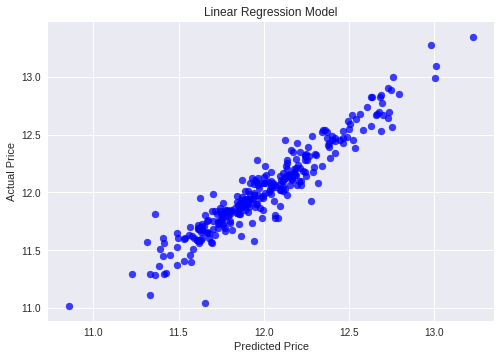

In [0]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75, color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

##08.2 Improving the model

We used ridge regularization to decrease the effect of less important features. We used parameter 'alpha' to control the strength of the regularization. 

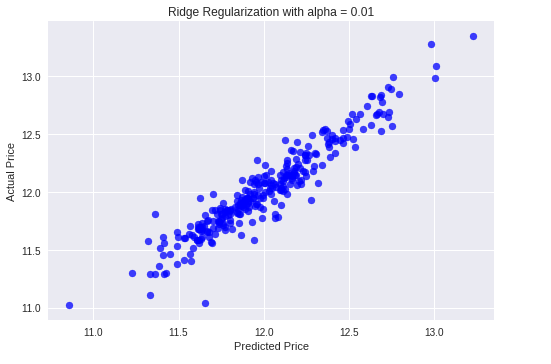

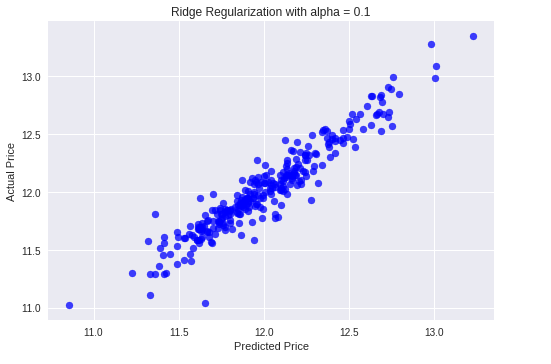

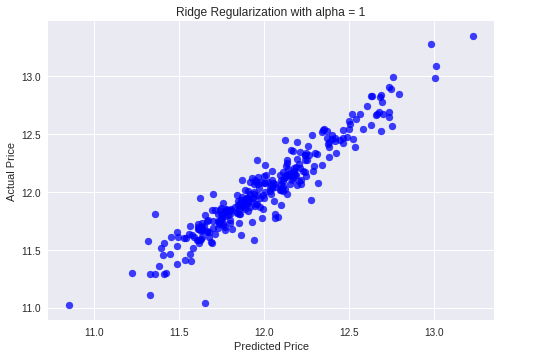

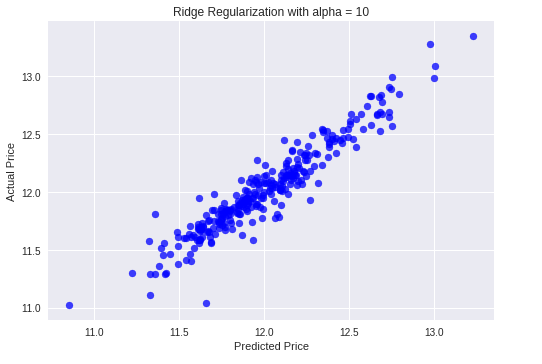

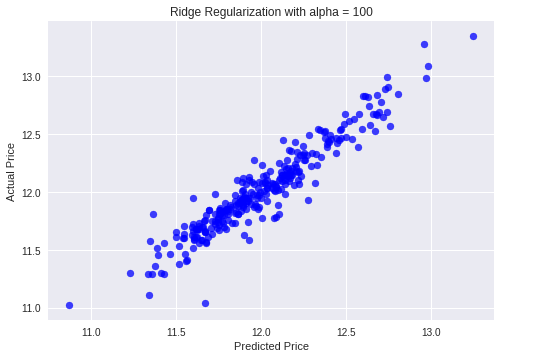

In [0]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

Kaggle Submission

In [0]:
submission = pd.DataFrame()
submission['Id'] = test.Id
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = model.predict(feats)
final_predictions = np.exp(predictions)
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])
submission['SalePrice'] = final_predictions
submission.head()
submission.to_csv('Kaggle_Houseprice_Linear_Regression.csv', index=False)

Original predictions are: 
 [11.7402948  11.8591088  12.05579187 12.18155008 12.09362045] 

Final predictions are: 
 [125529.34012351 141366.17707053 172093.26845234 195155.13437513
 178728.01385774]


##08.3 Submission result

![alt text](https://puu.sh/CLyFy/da071dd323.png)

#09. Deep Neural Network using Tensorflow

In [0]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
373,20,79.0,10634,5,6,1953,1953,0.0,428,180,...,0,0,0,0,0,0,11,2009,1,0
83,20,80.0,8892,5,5,1960,1960,66.0,0,0,...,0,0,0,0,0,0,7,2007,1,0
925,20,86.0,15611,5,6,1977,1977,0.0,767,93,...,0,0,0,0,0,0,3,2008,1,0
345,50,65.0,6435,6,5,1939,1950,0.0,0,0,...,0,0,0,0,0,0,10,2006,1,0
1233,20,62.5,12160,5,5,1959,1959,180.0,1000,0,...,0,0,0,0,0,0,5,2010,1,0


##09.1 Processing for Neural Network

In [0]:
y = np.log1p(train.SalePrice)

In [0]:
from sklearn.model_selection import train_test_split
X_train_val, X_test_val, y_train_val, y_test_val= train_test_split(X, y, random_state=23, test_size=.20)

In [0]:
X_train_val.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
373,20,79.0,10634,5,6,1953,1953,0.0,428,180,...,0,0,0,0,0,0,11,2009,1,0
83,20,80.0,8892,5,5,1960,1960,66.0,0,0,...,0,0,0,0,0,0,7,2007,1,0
925,20,86.0,15611,5,6,1977,1977,0.0,767,93,...,0,0,0,0,0,0,3,2008,1,0
345,50,65.0,6435,6,5,1939,1950,0.0,0,0,...,0,0,0,0,0,0,10,2006,1,0
1233,20,62.5,12160,5,5,1959,1959,180.0,1000,0,...,0,0,0,0,0,0,5,2010,1,0


##09.2 The Model

We declared the number of steps, learning rate and the number of nodes in each hidden layer here.

In [0]:
import tensorflow as tf

tf.reset_default_graph()

learning_rate = 0.1 
num_steps =60000
beta = .005
hidden_1 = 16 
hidden_2 = 8
hidden_3 = 4 
input_dim = X_train_val.shape[1]
output_dim = 1  
X_tf = tf.placeholder("float" ) 
y_tf = tf.placeholder("float" ) 

##09.3 Weights and Bias
Node  is the basic unit of a neural network. It gets certain number of inputs and a bias value. When a signal(value) arrives, it gets multiplied by a weight value. If a neuron has 4 inputs, it has 4 weight values which can be adjusted during training time.<br /> 
Bias is an extra input to neurons and it is always 1, and has it’s own connection weight. This makes sure that even when all the inputs are none (all 0’s) there is going to be an activation in the neuron.

In [0]:
weights = {'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])),  
           'w2': tf.Variable(tf.random_normal([hidden_1, hidden_2])),  
           'w3': tf.Variable(tf.random_normal([hidden_2, hidden_3])), 
           'out': tf.Variable(tf.random_normal([hidden_3, output_dim ])) }

biases = {'b1': tf.Variable(tf.random_normal([hidden_1])),
          'b2': tf.Variable(tf.random_normal([hidden_2])),
          'b3': tf.Variable(tf.random_normal([hidden_3])),
          'out': tf.Variable(tf.random_normal([output_dim])) } 

It connects one neuron in one layer to another neuron in other layer or the same layer. A connection always has a weight value associated with it. Goal of the training is to update this weight value to decrease the loss(error).

##09.4 Activation function
Activation functions are used to introduce non-linearity to neural networks. It squashes the values in a smaller range. A sigmoid activation function squashes values between a range of 0 to 1. There are many activation functions used in deep learning industry and ReLU, SeLU and TanH are preferred over sigmoid activation function. Here we used ReLU as activation function.

In [0]:
def ann_model(X_val): 
        layer_1 = tf.add(tf.matmul(X_val, weights['w1']), biases['b1' ]) 
        layer_1 = tf.nn.relu(layer_1) 
        layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
        layer_2 = tf.nn.relu(layer_2) 
        layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']) 
        layer_3 = tf.nn.relu(layer_3)
        layer_out = tf.add(tf.matmul(layer_3, weights['out']), biases ['out'],name="layer_out") 
        return layer_out 

##09.5 Loss function
The loss function computes the error for a single training example. The cost function is the average of the loss functions of the entire training set.<br /> 
<br /> 
1.‘mse’ stands for mean squared error.<br /> 
2.‘binary_crossentropy’ stands for binary logarithmic loss (logloss).<br /> 
3.‘categorical_crossentropy’ stands for multi-class logarithmic loss (logloss).<br /> 
Here we used MSE as the loss function.

In [0]:
# Model Construction 
model = ann_model(X_tf) 
# Mean Squared Error cost function
loss= tf.reduce_mean(tf.square(y_tf - model)) 

##09.6 Regularization
It is used to overcome the over-fitting problem. In regularization we penalize our loss term by adding a L1 (LASSO) or an L2(Ridge) norm on the weight vector w (it is the vector of the learned parameters in the given algorithm).
L(Loss function) + λN(w) — here λ is our regularization term and N(w) is L1 or L2 norm. Here we used L2.



In [0]:

regularizer_1 = tf.nn.l2_loss(weights['w1']) 
regularizer_2 = tf.nn.l2_loss(weights['w2']) 
regularizer_3 = tf.nn.l2_loss(weights['w3']) 
cost = tf.reduce_mean(loss + beta*regularizer_1 + beta*regularizer_2 
                      + regularizer_3)

##09.7 Model Optimizers
The optimizer is a search technique which is used to update weights in the model.<br /> 

SGD: Stochastic Gradient Descent, with support for momentum.<br /> 

RMSprop: Adaptive learning rate optimization method proposed by Geoff Hinton.<br /> 

Adam: Adaptive Moment Estimation (Adam) that also uses adaptive learning rates<br /> 

Here we used Adam.

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) .minimize(cost)
init = tf.global_variables_initializer() 
saver = tf.train.Saver() 

##09.8 Graph and Session
TensorFlow uses a dataflow graph to represent our computation in terms of the dependencies between individual operations. This leads to a low-level programming model in which we first define the dataflow graph, then create a TensorFlow session to run parts of the graph across a set of local and remote devices. Our model will search for the rate which minimizes loss and will save it. Then it will see if the loss is going up or down and if the loss is not minimizing anymore it will stop iteration. 



In [0]:
max_checks_without_progress = 1500
checks_without_progress = 0
best_loss = np.infty
with tf.Session() as sess: 
        sess.run(init) 
        for i in range(num_steps): 
            sess.run(optimizer, feed_dict={X_tf:X_train_val, y_tf:y_train_val})  
            if (i+1)%100 == 0: 
                loss_val = cost.eval(feed_dict={X_tf: X_test_val, y_tf: y_test_val})
                print("batch no : ",i+1,"Loss",loss_val) 
                           #Check whether to stop or not
                if loss_val < best_loss:
                    save_path = saver.save(sess,"./Final_model.ckpt")
                    best_loss = loss_val
                    checks_without_progress = 0
                else:
                    checks_without_progress += 1
                    if checks_without_progress > max_checks_without_progress:
                        print("Early stopping!")
                        break
        save_path = saver.save(sess, "/tmp/final2.ckpt") 
        print("Model saved in path: %s" % save_path) 
        pred = sess.run(model, feed_dict={X_tf:data_test}) 
with tf.Session() as sess:
    saver.restore(sess, "./Final_model.ckpt")
    pred = sess.run(model, feed_dict={X_tf:data_test}) 


batch no :  100 Loss 127.245
batch no :  200 Loss 126.78666
batch no :  300 Loss 126.32196
batch no :  400 Loss 125.85164
batch no :  500 Loss 125.35566
batch no :  600 Loss 124.82097
batch no :  700 Loss 124.241356
batch no :  800 Loss 123.613976
batch no :  900 Loss 122.93792
batch no :  1000 Loss 122.212074
batch no :  1100 Loss 121.43587
batch no :  1200 Loss 120.60883
batch no :  1300 Loss 119.72988
batch no :  1400 Loss 118.79865
batch no :  1500 Loss 117.81433
batch no :  1600 Loss 116.776405
batch no :  1700 Loss 115.683975
batch no :  1800 Loss 114.53659
batch no :  1900 Loss 113.33352
batch no :  2000 Loss 112.07392
batch no :  2100 Loss 110.75728
batch no :  2200 Loss 109.3829
batch no :  2300 Loss 107.950386
batch no :  2400 Loss 106.459015
batch no :  2500 Loss 104.90831
batch no :  2600 Loss 103.298065
batch no :  2700 Loss 101.62799
batch no :  2800 Loss 99.897964
batch no :  2900 Loss 98.10816
batch no :  3000 Loss 96.25853
batch no :  3100 Loss 94.3497
batch no :  3200

In [0]:
 prediction = np.expm1(pred) 

In [0]:
sub = pd.DataFrame()

sub['Id'] = test_ID
sub['SalePrice'] = prediction

sub.to_csv('submission_DNN_WD.csv',index=False)

We saved the file for submission in here. 

#09.9 Result Submission


![alt text](https://puu.sh/D5xJk/8f62bd3349.png)

#10. References 
1. https://www.kaggle.com/dimitreoliveira/house-prices-deep-learning-aproach-tensorflow <br />
2. https://www.kaggle.com/karthikramesh55/iowa-housing-price-prediction-regression-models/notebook?fbclid=IwAR0QixSNKX7WaVGc0yMYOL0S7RO7Lh3Z92BOiVArOIvr6Ik1w4COWxNnCFM <br />
3. https://www.dataquest.io/blog/kaggle-getting-started/ <br />
4. https://towardsdatascience.com/simple-house-price-predictor-using-ml-through-tensorflow-in-python-cbd2b637904b <br />
5. https://medium.com/@saxenarohan97/intro-to-tensorflow-solving-a-simple-regression-problem-e87b42fd4845?fbclid=IwAR15Tjc8pnQxLfVst3q2UcF5-DU9mfqrvDgnvD_SgWJp8hk1HGgIV9-4a1w <br />
6. https://www.tensorflow.org/guide/low_level_intro <br />
7. https://github.com/ageron/handson-ml/blob/master/09_up_and_running_with_tensorflow.ipynb?fbclid=IwAR3ONq_3VzaJ6bw_tdnu2Z-YNRe6cY7lmuZpyQxjbwW-CkAuc6LKDl0V36w <br />
8. https://github.com/IshrakHasin/House-price/tree/master <br />
9. https://medium.com/@_NicT_/my-first-kaggle-791e57cd5737 <br />
10. https://medium.com/@shantanusingh_71633/regression-in-neural-networks-using-tensorflow-low-level-apis-818b8bb7b433
